In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objects as go
import re
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

#Silahkan Tambahkan Package lainnya jika dibutuhkan

In [ ]:
from google.colab import drive

# Replace 'SHARED_FOLDER_LINK' with the actual link of the shared folder
folder_link = 'https://drive.google.com/drive/folders/1Cd1iNDv4gfTUX41myo2m4Fazz_zA9HBG?usp=drive_link'

# Extract the folder ID from the link (you can find it in the URL after 'folders/')
folder_id = folder_link.split('/')[-1]

# Mount the shared folder in Colab
drive.mount('/content/drive', force_remount=True)

# Define the path to the shared folder without including the link
folder_path = '/content/drive/Shared with me/' + folder_id + '/'

Mounted at /content/drive


In [ ]:
github_url = 'https://github.com/BigData-Maestros/Final-Project/blob/8e9096871adfc540aa73b532558bd1f7ebb1c07d/Dataset/Training-Data.csv'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Rakamin Academy/Big Data Maestros (Final Project Group)/Loan predictor/Training Data.csv')

## Membaca Dataset Loan Predictor Based On Customer Behavior


In [ ]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


Mengubah kolom Id menjadi kolom index

In [ ]:
df.set_index('Id', inplace=True)
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


## Descriptive Statistik Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


Dari informasi di atas, dapat diketahui bahwa nama kolom dengan tipe datanya sudah sesuai.

In [ ]:
# Mengetahui jumlah kolom dan baris
jumlah_baris, jumlah_kolom = df.shape

# Menampilkan hasil
print("Jumlah Baris:", jumlah_baris)
print("Jumlah Kolom:", jumlah_kolom)

Jumlah Baris: 252000
Jumlah Kolom: 12


Dari informasi di atas, dapat diketahui bahwa pada dataset ini nama kolom beserta tipe datanya sudah sesuai. Dengan jumlah baris sebanyak 252.000 dan jumlah kolom sebanyak 13.

In [ ]:
df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

Dari informasi di atas, diketahui bahwa tidak ada nilai kosong pada masing-masing kolom.

In [ ]:
# Mengganti nama kolom
df.rename(columns={'Income': 'income', 'Age': 'age', 'Experience': 'experience', 'Married/Single': 'marital_status', 'House_Ownership': 'house_ownership', 'Car_Ownership': 'car_ownership', 'Profession': 'profession', 'CITY': 'city', 'STATE': 'state', 'CURRENT_JOB_YRS': 'current_job_yrs', 'CURRENT_HOUSE_YRS': 'current_house_yrs', 'Risk_Flag': 'risk_flag'}, inplace=True)

# Menampilkan DataFrame setelah perubahan
print("\nDataFrame Setelah Perubahan Nama Kolom:")
df.info()


DataFrame Setelah Perubahan Nama Kolom:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   income             252000 non-null  int64 
 1   age                252000 non-null  int64 
 2   experience         252000 non-null  int64 
 3   marital_status     252000 non-null  object
 4   house_ownership    252000 non-null  object
 5   car_ownership      252000 non-null  object
 6   profession         252000 non-null  object
 7   city               252000 non-null  object
 8   state              252000 non-null  object
 9   current_job_yrs    252000 non-null  int64 
 10  current_house_yrs  252000 non-null  int64 
 11  risk_flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


Nama kolom sudah seragam.

In [ ]:
nums = ['income', 'age', 'experience', 'current_job_yrs', 'current_house_yrs', 'risk_flag']
cats = ['marital_status', 'house_ownership', 'car_ownership', 'profession', 'city', 'state']

# melihat deskripsi kolom kategorikal & nilai unique
df.select_dtypes(include='object').nunique()

marital_status       2
house_ownership      3
car_ownership        2
profession          51
city               317
state               29
dtype: int64

In [ ]:
# cek nilai unique di kolom kategorikal
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

marital_status: ['single' 'married']
house_ownership: ['rented' 'norent_noown' 'owned']
car_ownership: ['no' 'yes']
profession: ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Technician' 'Microbiologist' 'Fashion_Designer'
 'Aviator' 'Psychologist' 'Magistrate' 'Lawyer' 'Firefighter' 'Engineer'
 'Official' 'Analyst' 'Geologist' 'Drafter' 'Statistician' 'Web_designer'
 'Consultant' 'Chef' 'Army_officer' 'Surgeon' 'Scientist' 'Civil_engineer'
 'Industrial_Engineer' 'Technology_specialist']
city: ['Rewa' 'Parbhani' 'Alappuzha' 'Bhubaneswar' 'Tiruchirappalli[10]'


In [ ]:
# Menghilangkan angka dan tanda kurung siku dari data di kolom "city"
df.city = df['city'].str.replace(r'\[\d+\]', '')
df.city = df.city.str.replace('_', ' ')

# Menampilkan DataFrame setelah perubahan
print(df.city)

Id
1                    Rewa
2                Parbhani
3               Alappuzha
4             Bhubaneswar
5         Tiruchirappalli
               ...       
251996            Kolkata
251997               Rewa
251998    Kalyan-Dombivli
251999        Pondicherry
252000              Avadi
Name: city, Length: 252000, dtype: object


In [ ]:
# Menampilkan nilai unik dan frekuensinya pada kolom 'city' yang sudah diurutkan dari frekuensi terkecil
sorted_value_counts_city1 = df.city.value_counts().sort_index()
print("Nilai Unik dan Frekuensi yang Sudah Diurutkan pada Kolom 'city':")
print(sorted_value_counts_city1)

# Menampilkan jumlah nilai unik
jumlah_nilai_unik_city1 = df.city.nunique()
print("\nJumlah Nilai Unik pada Kolom 'city':", jumlah_nilai_unik_city1)

Nilai Unik dan Frekuensi yang Sudah Diurutkan pada Kolom 'city':
Adoni             953
Agartala          809
Agra             1012
Ahmedabad         649
Ahmednagar        645
                 ... 
Vijayanagaram    1259
Vijayawada       1172
Visakhapatnam     971
Warangal          459
Yamunanagar       659
Name: city, Length: 316, dtype: int64

Jumlah Nilai Unik pada Kolom 'city': 316


In [ ]:
# Menghilangkan angka dan tanda kurung siku dari data di kolom "state"
df.state = df['state'].str.replace(r'\[\d+\]', '')
df.state = df.state.str.replace('_', ' ')

# Menampilkan DataFrame setelah perubahan
print(df.state)

Id
1         Madhya Pradesh
2            Maharashtra
3                 Kerala
4                 Odisha
5             Tamil Nadu
               ...      
251996       West Bengal
251997    Madhya Pradesh
251998       Maharashtra
251999        Puducherry
252000        Tamil Nadu
Name: state, Length: 252000, dtype: object


In [ ]:
# Menampilkan nilai unik dan frekuensinya pada kolom 'state' yang sudah diurutkan dari frekuensi terkecil
sorted_value_counts_state1 = df.state.value_counts().sort_index()
print("Nilai Unik dan Frekuensi yang Sudah Diurutkan pada Kolom 'state':")
print(sorted_value_counts_state1)

# Menampilkan jumlah nilai unik
jumlah_nilai_unik_state1 = df.state.nunique()
print("\nJumlah Nilai Unik pada Kolom 'state':", jumlah_nilai_unik_state1)

Nilai Unik dan Frekuensi yang Sudah Diurutkan pada Kolom 'state':
Andhra Pradesh       25297
Assam                 7062
Bihar                19780
Chandigarh             656
Chhattisgarh          3834
Delhi                 5490
Gujarat              11408
Haryana               7890
Himachal Pradesh       833
Jammu and Kashmir     1780
Jharkhand             8965
Karnataka            11855
Kerala                5805
Madhya Pradesh       14122
Maharashtra          25562
Manipur                849
Mizoram                849
Odisha                4658
Puducherry            1433
Punjab                4720
Rajasthan             9174
Sikkim                 608
Tamil Nadu           16537
Telangana             7524
Tripura                809
Uttar Pradesh        29143
Uttarakhand           1874
West Bengal          23483
Name: state, dtype: int64

Jumlah Nilai Unik pada Kolom 'state': 28


In [ ]:
# melihat data summary
df[nums].describe()

,income,age,experience,current_job_yrs,current_house_yrs,risk_flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [ ]:
# melihat data summary
df[cats].describe()

,marital_status,house_ownership,car_ownership,profession,city,state
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,316,28
top,single,rented,no,Physician,Aurangabad,Uttar Pradesh
freq,226272,231898,176000,5957,1543,29143


**Kesimpulan dari Descriptive Statistics**

1. Data terdiri dari 252000 baris dan 13 kolom serta tidak ada nilai null.
2. 5 kolom dengan variabel kontinu : income , age , experience , current_job_yrs , current_house_yrs.
3. 8 kolom dengan variabel kategori : id , married_single,house_ownership, car_ownership , profession , city , state , risk_flag (target variabel).

## Univariate Analysis

**Distribusi Histogram**

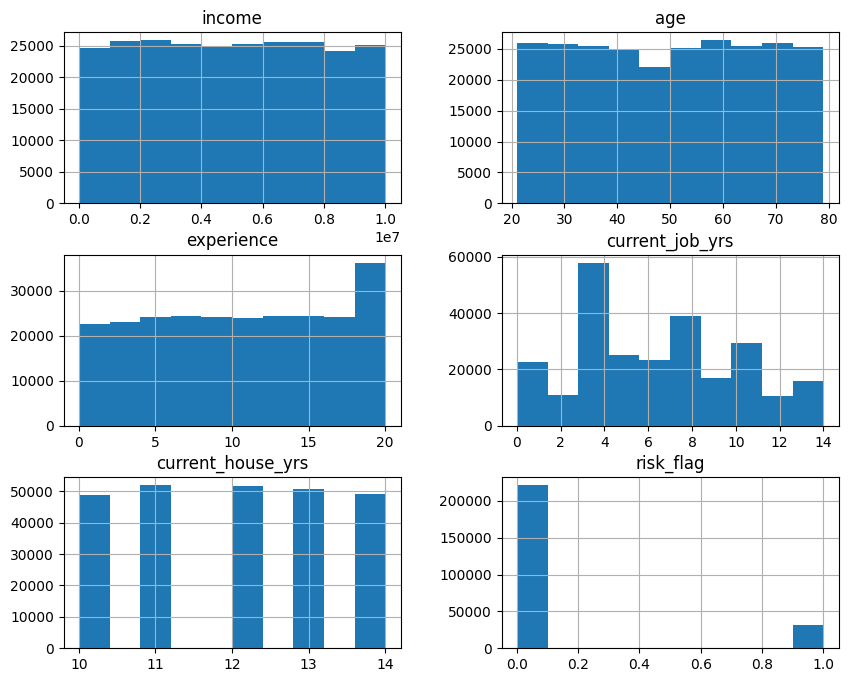

In [ ]:
df.hist( figsize = (10, 8) )
plt.show()

**Skewness**

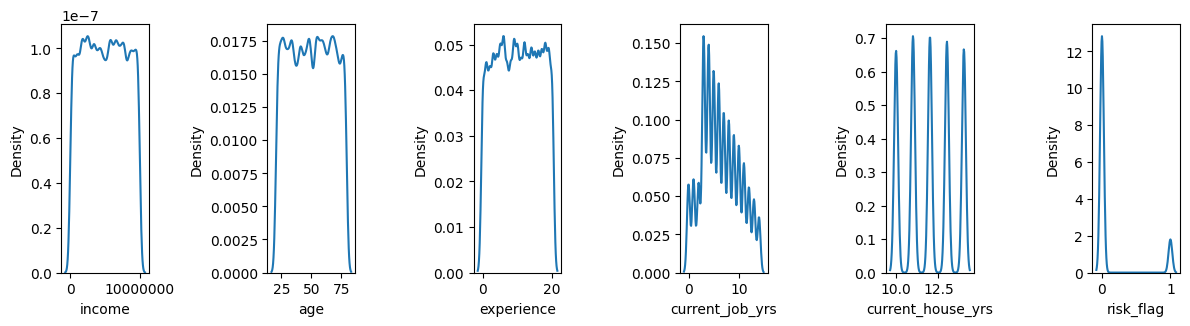

In [ ]:
# Visualize skewness using seaborn
plt.figure(figsize=(12, 6))

for i in range(0, len(nums)):
    plt.subplot(2, len(nums), i+1)
    sns.kdeplot(df[nums[i]])
    plt.ticklabel_format(style='plain', axis='x')
    plt.tight_layout()
plt.show()

Distribusi data pada dataset ini adalah multimodal.

**Outlier**

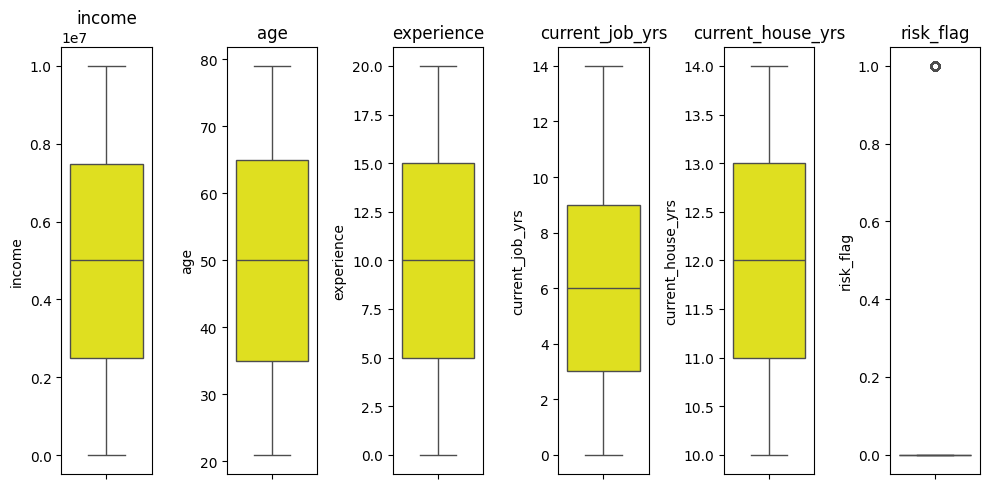

In [ ]:
plt.figure(figsize=(10, 5))
for i, column in enumerate(nums, 1):
    plt.subplot(1, len(nums), i)
    sns.boxplot(y=df[column], color='yellow', orient='v')
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

Dari informasi di atas, dapat diketahui bahwa pada dataset ini tidak ada outlier.

**Distribusi Count per Kolom**

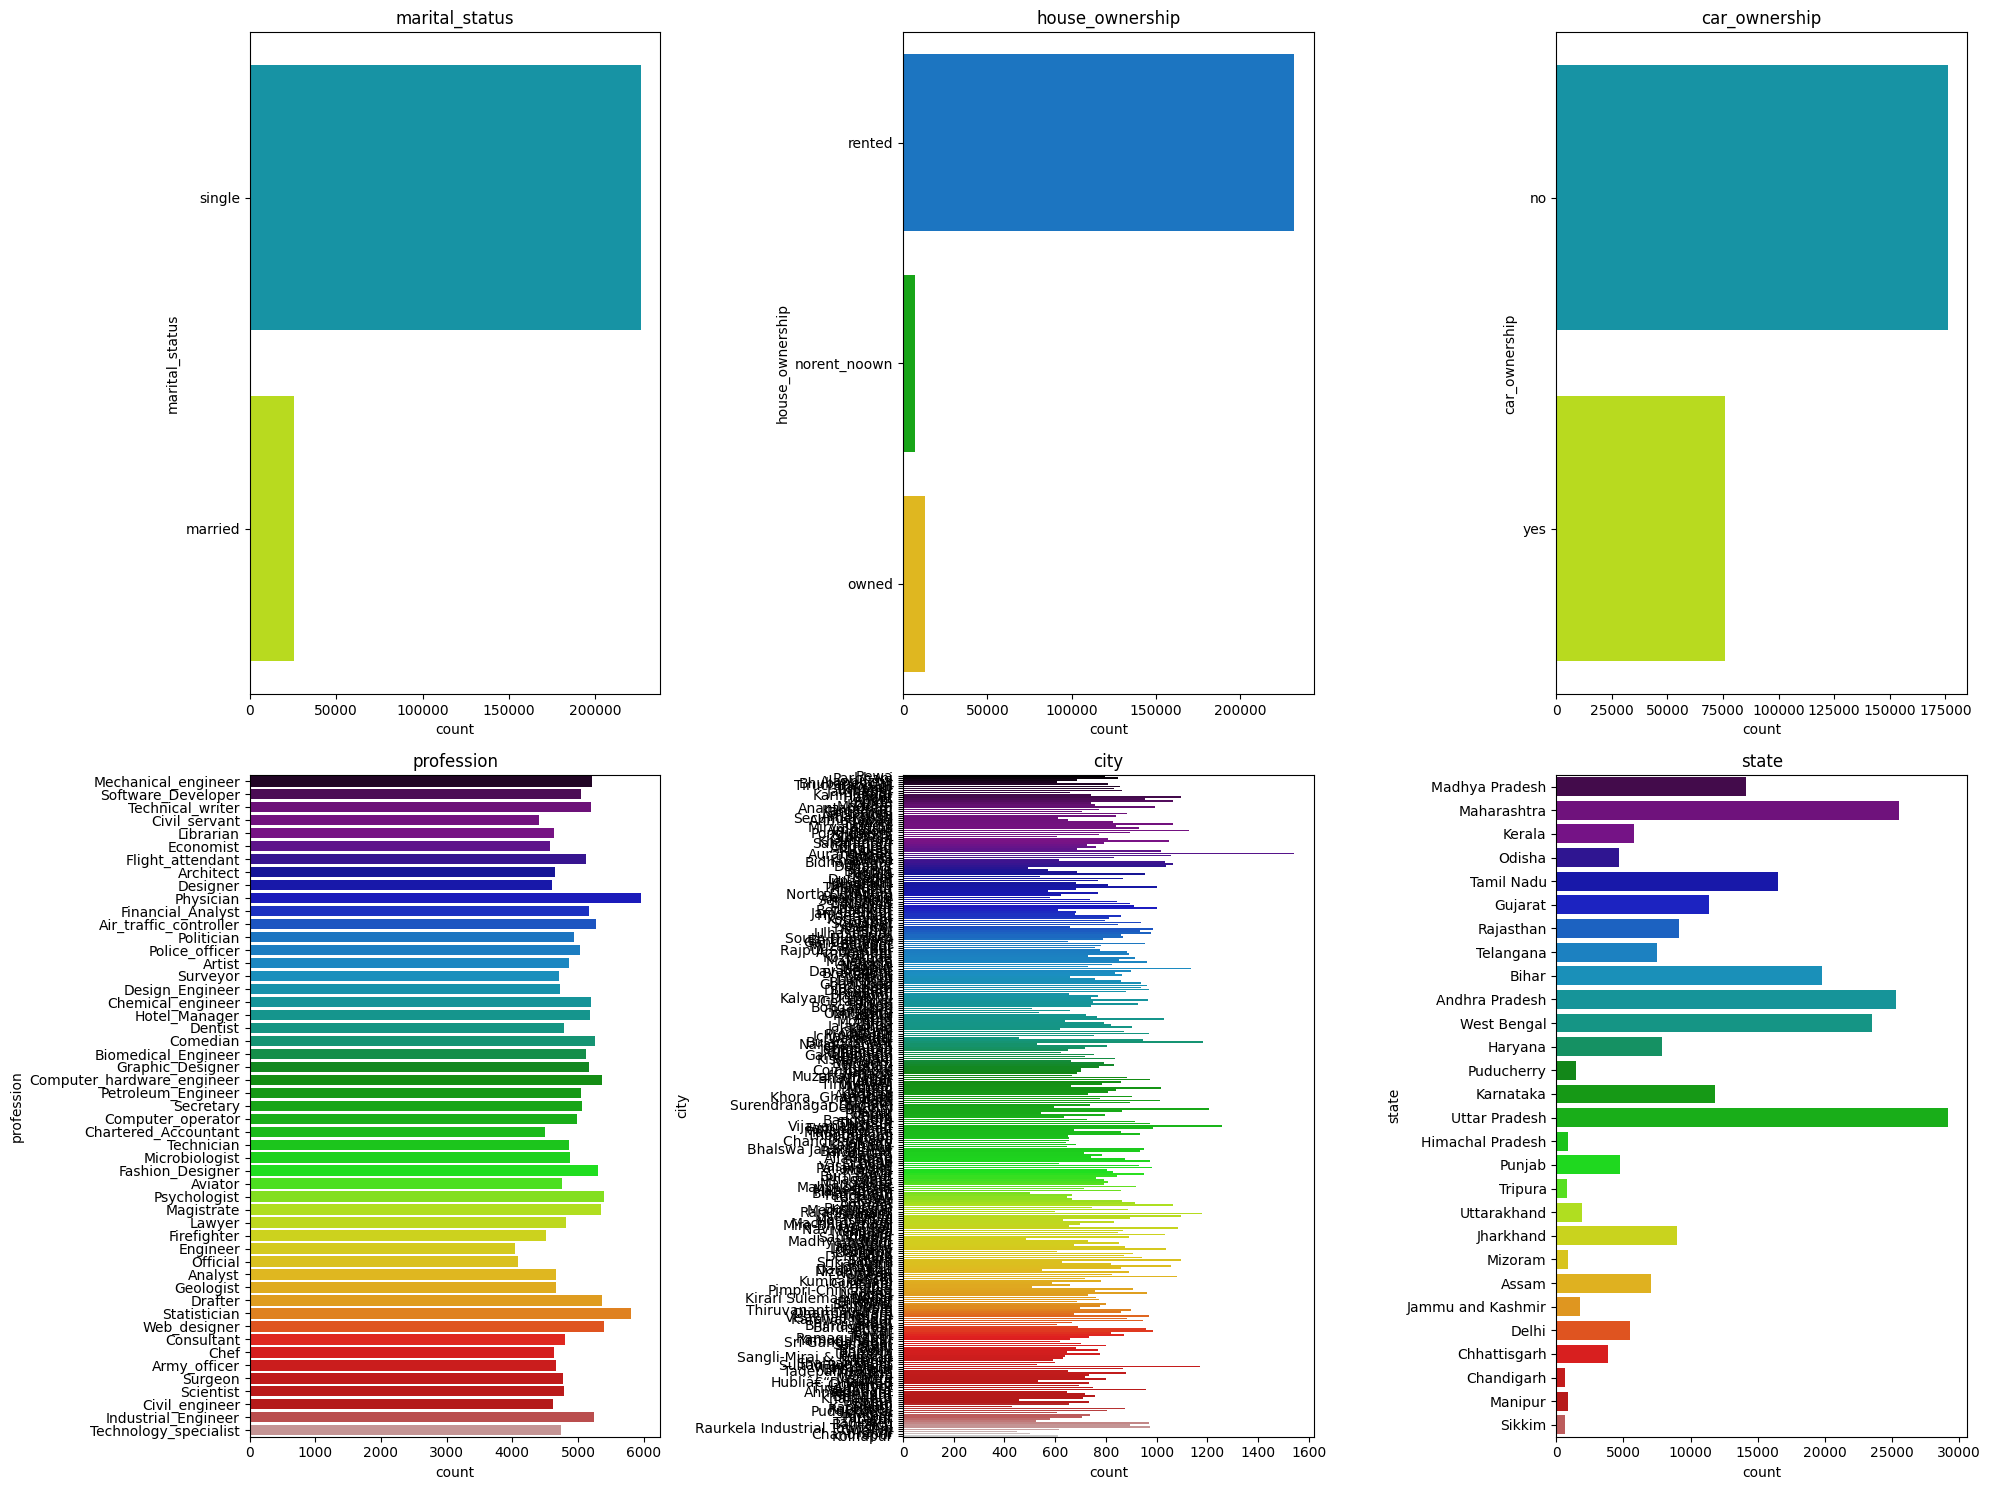

In [ ]:
# Membuat satu subplot untuk setiap count plot
plt.figure(figsize=(20, 15))

for i, column in enumerate(cats, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, y=column, palette="nipy_spectral")
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

**Kesimpulan dari Distribusi Data**

1. Kolom-kolom seperti city, state, dan profession memiliki data yang sangat banyak, sehingga diperlukan pengelompokan data untuk menggabungkan kategori serupa menjadi satu kategori baru. Tujuannya adalah untuk menyederhanakan data.
2. Ditemukan ketidakseimbangan dominasi kategori pada kolom marital_status dan house_ownership, yang dapat memengaruhi hasil analisis. Oleh karena itu, perlu dipertimbangkan apakah tindakan seperti oversampling atau undersampling diperlukan untuk menangani ketidakseimbangan tersebut.

**Pengelompokan Kategori Data Numerik Berdasarkan Kuartil**



> Kategori Kolom income



In [ ]:
df_income = pd.DataFrame(df)

# Menghitung kuartil
quartiles = df_income['income'].quantile([0, 0.33, 0.67, 1])

# Membuat fungsi untuk mengkategori income
def categorize_income(income):
    if income <= quartiles[0.33]:
        return 'low'
    elif income <= quartiles[0.67]:
        return 'middle'
    else:
        return 'high'

# Menerapkan fungsi ke kolom baru 'Income_Category'
df_income['income_category'] = df_income['income'].apply(categorize_income)

In [ ]:
# Mengurutkan nilai pada kategori 'low'
low_data_sorted = df_income[df_income['income_category'] == 'low'].sort_values(by='income')

# Menampilkan data yang sudah diurutkan
low_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category
Id,,,,,,,,,,,,,
129857,10310,70,20,single,rented,yes,Engineer,Baranagar,West Bengal,7,14,0,low
205454,10310,70,20,single,rented,yes,Engineer,Baranagar,West Bengal,7,14,0,low
194614,10310,70,20,single,rented,yes,Engineer,Baranagar,West Bengal,7,14,0,low
86666,10310,70,20,single,rented,yes,Engineer,Baranagar,West Bengal,7,14,0,low
257,10310,70,20,single,rented,yes,Engineer,Baranagar,West Bengal,7,14,0,low


In [ ]:
# Mengurutkan nilai pada kategori 'low'
low_data_sorted = df_income[df_income['income_category'] == 'low'].sort_values(by='income', ascending=False)

# Menampilkan data yang sudah diurutkan
low_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category
Id,,,,,,,,,,,,,
206944,3291384,42,4,single,rented,no,Software_Developer,Nandyal,Andhra Pradesh,4,12,1,low
34069,3291384,42,4,single,rented,no,Software_Developer,Nandyal,Andhra Pradesh,4,12,1,low
55707,3291384,42,4,single,rented,no,Software_Developer,Nandyal,Andhra Pradesh,4,12,0,low
50282,3291384,42,4,single,rented,no,Software_Developer,Nandyal,Andhra Pradesh,4,12,1,low
142098,3291384,42,4,single,rented,no,Software_Developer,Nandyal,Andhra Pradesh,4,12,1,low


In [ ]:
# Mengurutkan nilai pada kategori 'middle'
middle_data_sorted = df_income[df_income['income_category'] == 'middle'].sort_values(by='income')

# Menampilkan data yang sudah diurutkan
middle_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category
Id,,,,,,,,,,,,,
232933,3291476,64,4,single,owned,no,Economist,Pallavaram,Tamil Nadu,3,10,1,middle
245769,3291683,52,19,single,rented,yes,Surveyor,Vadodara,Gujarat,10,14,1,middle
217069,3291892,71,10,single,rented,yes,Air_traffic_controller,Tiruchirappalli,Tamil Nadu,6,13,0,middle
229011,3292164,60,2,single,rented,yes,Army_officer,Amroha,Uttar Pradesh,2,12,0,middle
232219,3292924,68,18,single,rented,yes,Lawyer,Muzaffarnagar,Uttar Pradesh,13,11,0,middle


In [ ]:
# Mengurutkan nilai pada kategori 'middle'
middle_data_sorted = df_income[df_income['income_category'] == 'middle'].sort_values(by='income', ascending=False)

# Menampilkan data yang sudah diurutkan
middle_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category
Id,,,,,,,,,,,,,
84074,6671351,28,14,single,rented,no,Technology_specialist,Munger,Bihar,13,12,1,middle
35389,6671351,28,14,single,rented,no,Technology_specialist,Munger,Bihar,13,12,1,middle
57032,6671351,28,14,single,rented,no,Technology_specialist,Munger,Bihar,13,12,1,middle
3072,6671351,28,14,single,rented,no,Technology_specialist,Munger,Bihar,13,12,1,middle
159583,6671351,28,14,single,rented,no,Technology_specialist,Munger,Bihar,13,12,0,middle


In [ ]:
# Mengurutkan nilai pada kategori 'high'
high_data_sorted = df_income[df_income['income_category'] == 'high'].sort_values(by='income')

# Menampilkan data yang sudah diurutkan
high_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category
Id,,,,,,,,,,,,,
217479,6671370,60,15,single,rented,no,Scientist,Begusarai,Bihar,6,14,0,high
241147,6671619,22,19,single,rented,no,Chemical_engineer,Dindigul,Tamil Nadu,10,12,0,high
226274,6672068,70,17,single,rented,yes,Firefighter,Jalgaon,Maharashtra,7,13,0,high
248867,6672164,36,17,single,rented,yes,Chartered_Accountant,Kochi,Kerala,14,11,0,high
214834,6672263,75,8,married,rented,yes,Army_officer,Nizamabad,Telangana,8,13,0,high


In [ ]:
# Mengurutkan nilai pada kategori 'high'
high_data_sorted = df_income[df_income['income_category'] == 'high'].sort_values(by='income', ascending=False)

# Menampilkan data yang sudah diurutkan
high_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category
Id,,,,,,,,,,,,,
229020,9999938,34,19,single,rented,yes,Police_officer,Panchkula,Haryana,6,13,0,high
225536,9999400,41,11,single,rented,no,Librarian,Jaipur,Rajasthan,10,14,0,high
162107,9999180,22,0,single,rented,no,Drafter,Bhavnagar,Gujarat,0,11,0,high
59575,9999180,22,0,single,rented,no,Drafter,Bhavnagar,Gujarat,0,11,0,high
64996,9999180,22,0,single,rented,no,Drafter,Bhavnagar,Gujarat,0,11,0,high




> Kategori Kolom age



In [ ]:
df_age = pd.DataFrame(df)

def classify_age(age):
    if age < 30:
        return 'young'
    elif age < 60:
        return 'adult'
    else:
        return 'elder'


# Menerapkan fungsi ke kolom baru 'Age_Category'
df_age['age_category'] = df_age['age'].apply(classify_age)

In [ ]:
# Mengurutkan nilai pada kategori 'young'
young_data_sorted = df_age[df_age['age_category'] == 'young'].sort_values(by='age')

# Menampilkan data yang sudah diurutkan
young_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category
Id,,,,,,,,,,,,,,
111589,3873393,21,7,single,rented,yes,Drafter,Lucknow,Uttar Pradesh,7,14,1,middle,young
129290,6062192,21,9,married,rented,no,Technology_specialist,Rajkot,Gujarat,7,13,0,middle,young
129279,8514369,21,5,single,rented,yes,Scientist,Udaipur,Rajasthan,4,13,0,high,young
19555,8075181,21,12,single,rented,no,Chartered_Accountant,Ongole,Andhra Pradesh,7,14,1,high,young
238373,4342961,21,3,single,rented,no,Engineer,Kishanganj,Bihar,3,12,0,middle,young


In [ ]:
# Mengurutkan nilai pada kategori 'young'
remaja_data_sorted = df_age[df_age['age_category'] == 'young'].sort_values(by='age', ascending=False)
# Menampilkan data yang sudah diurutkan
remaja_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category
Id,,,,,,,,,,,,,,
126537,3671761,29,18,single,rented,yes,Scientist,Dehradun,Uttarakhand,3,14,0,middle,young
153465,3671761,29,18,single,rented,yes,Scientist,Dehradun,Uttarakhand,3,14,0,middle,young
153607,4432896,29,14,single,rented,no,Civil_engineer,Kavali,Andhra Pradesh,13,14,0,middle,young
216033,6298584,29,13,single,rented,no,Air_traffic_controller,Noida,Uttar Pradesh,10,10,0,middle,young
153559,9082904,29,13,single,rented,no,Artist,Mango,Jharkhand,11,12,0,high,young


In [ ]:
# Mengurutkan nilai pada kategori 'adult'
adult_data_sorted = df_age[df_age['age_category'] == 'adult'].sort_values(by='age')

# Menampilkan data yang sudah diurutkan
adult_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category
Id,,,,,,,,,,,,,,
153383,5796023,30,3,single,rented,no,Dentist,Buxar,Bihar,3,11,1,middle,adult
208441,9173092,30,19,single,rented,no,Psychologist,Chapra,Bihar,9,11,1,high,adult
72372,3696953,30,17,single,rented,no,Web_designer,Allahabad,Uttar Pradesh,4,11,0,middle,adult
45910,4244135,30,9,single,rented,no,Librarian,Thanjavur,Tamil Nadu,9,10,0,middle,adult
164139,5796023,30,3,single,rented,no,Dentist,Buxar,Bihar,3,11,1,middle,adult


In [ ]:
# Mengurutkan nilai pada kategori 'adult'
adult_data_sorted = df_age[df_age['age_category'] == 'adult'].sort_values(by='age', ascending=False)

# Menampilkan data yang sudah diurutkan
adult_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category
Id,,,,,,,,,,,,,,
240294,5678134,59,1,single,rented,no,Chef,Cuttack,Odisha,1,11,0,middle,adult
161396,3369187,59,3,single,rented,yes,Surgeon,Tirunelveli,Tamil Nadu,3,14,1,middle,adult
46117,5465069,59,15,single,rented,yes,Aviator,Proddatur,Andhra Pradesh,3,11,0,middle,adult
32369,9861298,59,16,single,rented,no,Technical_writer,North Dumdum,West Bengal,9,11,1,high,adult
218030,337721,59,7,single,rented,no,Police_officer,Jalna,Maharashtra,7,10,0,low,adult


In [ ]:
# Mengurutkan nilai pada kategori 'elder'
elder_data_sorted = df_age[df_age['age_category'] == 'elder'].sort_values(by='age')

# Menampilkan data yang sudah diurutkan
elder_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category
Id,,,,,,,,,,,,,,
206591,424512,60,16,single,rented,no,Designer,Bhopal,Madhya Pradesh,5,11,1,low,elder
56099,9842635,60,7,married,owned,yes,Politician,Malda,West Bengal,7,11,0,high,elder
214543,9035347,60,3,single,rented,yes,Computer_operator,Bahraich,Uttar Pradesh,3,13,0,high,elder
183889,7867670,60,19,single,rented,no,Biomedical_Engineer,Bhavnagar,Gujarat,12,13,0,high,elder
10050,6669896,60,15,single,rented,yes,Computer_hardware_engineer,Rampur,Uttar Pradesh,14,12,0,middle,elder


In [ ]:
# Mengurutkan nilai pada kategori 'elder'
elder_data_sorted = df_age[df_age['age_category'] == 'elder'].sort_values(by='age', ascending=False)

# Menampilkan data yang sudah diurutkan
elder_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category
Id,,,,,,,,,,,,,,
204746,5203994,79,3,single,rented,yes,Air_traffic_controller,Sasaram,Bihar,3,14,0,middle,elder
28705,9910826,79,8,single,rented,no,Architect,Kurnool,Andhra Pradesh,8,10,0,high,elder
68165,8724013,79,19,single,rented,no,Economist,Morena,Madhya Pradesh,13,12,0,high,elder
104676,9962662,79,19,single,rented,no,Microbiologist,Amritsar,Punjab,7,11,0,high,elder
11964,9187149,79,1,single,rented,yes,Chartered_Accountant,Nagaon,Assam,1,13,0,high,elder




> Kategori Kolom experience



In [ ]:
df_experience = pd.DataFrame(df)

# Menghitung kuartil
quartiles = df_experience['experience'].quantile([0, 0.33, 0.67, 1])

# Membuat fungsi untuk mengkategori experience
def categorize_experience(experience):
    if experience <= quartiles[0.33]:
        return 'beginner'
    elif experience <= quartiles[0.67]:
        return 'advance'
    else:
        return 'expert'

# Menerapkan fungsi ke kolom baru 'Experience_Category'
df_experience['experience_category'] = df_experience['experience'].apply(categorize_experience)

In [ ]:
# Mengurutkan nilai pada kategori 'beginner'
experience_data_sorted = df_experience[df_experience['experience_category'] == 'beginner'].sort_values(by='experience')

# Menampilkan data yang sudah diurutkan
experience_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category
Id,,,,,,,,,,,,,,,
251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0,middle,adult,beginner
57854,1138928,46,0,single,rented,no,Scientist,Dharmavaram,Andhra Pradesh,0,13,0,low,adult,beginner
57858,3218946,25,0,single,rented,no,Software_Developer,Vijayanagaram,Andhra Pradesh,0,11,1,low,young,beginner
190808,1743237,66,0,single,rented,no,Civil_servant,Guntur,Andhra Pradesh,0,14,0,low,elder,beginner
190789,1351218,57,0,single,rented,yes,Politician,Pimpri-Chinchwad,Maharashtra,0,12,0,low,adult,beginner


In [ ]:
# Mengurutkan nilai pada kategori 'beginner'
experience_data_sorted = df_experience[df_experience['experience_category'] == 'beginner'].sort_values(by='experience', ascending=False)

# Menampilkan data yang sudah diurutkan
experience_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category
Id,,,,,,,,,,,,,,,
95549,2987685,59,6,single,rented,yes,Technical_writer,Ballia,Uttar Pradesh,6,10,0,low,adult,beginner
162857,2453112,34,6,single,rented,no,Microbiologist,Rampur,Uttar Pradesh,6,14,0,low,adult,beginner
224662,3790110,76,6,single,rented,yes,Computer_hardware_engineer,Anantapuram,Andhra Pradesh,6,14,0,middle,elder,beginner
224661,9779128,74,6,single,owned,yes,Police_officer,Mumbai,Maharashtra,6,11,0,high,elder,beginner
162832,4486618,31,6,single,norent_noown,yes,Police_officer,Yamunanagar,Haryana,6,10,0,middle,adult,beginner


In [ ]:
# Mengurutkan nilai pada kategori 'advance'
experience_data_sorted = df_experience[df_experience['experience_category'] == 'advance'].sort_values(by='experience')

# Menampilkan data yang sudah diurutkan
experience_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category
Id,,,,,,,,,,,,,,,
251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,middle,adult,advance
186276,6253045,75,7,single,rented,no,Consultant,Akola,Maharashtra,7,11,0,middle,elder,advance
186269,2309585,31,7,married,rented,no,Surveyor,Mirzapur,Uttar Pradesh,7,10,0,low,adult,advance
186253,6520687,63,7,single,norent_noown,no,Psychologist,Vadodara,Gujarat,5,10,0,middle,elder,advance
186237,5978301,73,7,single,rented,yes,Aviator,Bhusawal,Maharashtra,7,11,0,middle,elder,advance


In [ ]:
# Mengurutkan nilai pada kategori 'advance'
experience_data_sorted = df_experience[df_experience['experience_category'] == 'advance'].sort_values(by='experience', ascending=False)

# Menampilkan data yang sudah diurutkan
experience_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category
Id,,,,,,,,,,,,,,,
99880,1363933,45,14,single,rented,yes,Artist,Jehanabad,Bihar,4,10,0,low,adult,advance
159743,7089126,76,14,single,rented,no,Engineer,Panchkula,Haryana,5,12,0,high,elder,advance
229325,2735957,66,14,single,rented,no,Industrial_Engineer,Begusarai,Bihar,6,12,0,low,elder,advance
30444,5097581,45,14,single,rented,no,Librarian,Durgapur,West Bengal,10,11,0,middle,adult,advance
30451,4055817,39,14,single,rented,no,Drafter,Gurgaon,Haryana,4,14,0,middle,adult,advance


In [ ]:
# Mengurutkan nilai pada kategori 'expert'
experience_data_sorted = df_experience[df_experience['experience_category'] == 'expert'].sort_values(by='experience')

# Menampilkan data yang sudah diurutkan
experience_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category
Id,,,,,,,,,,,,,,,
179143,2876720,65,15,single,rented,no,Fashion_Designer,Durg,Chhattisgarh,4,14,0,low,elder,expert
55716,1932556,56,15,single,rented,no,Mechanical_engineer,Narasaraopet,Andhra Pradesh,4,13,0,low,adult,expert
176457,3935358,54,15,single,norent_noown,yes,Scientist,Kanpur,Uttar Pradesh,5,10,0,middle,adult,expert
176452,8928667,38,15,single,rented,no,Chemical_engineer,Saharsa,Bihar,3,10,1,high,adult,expert
176441,1853650,56,15,single,rented,no,Chemical_engineer,Nanded,Maharashtra,6,10,0,low,adult,expert


In [ ]:
# Mengurutkan nilai pada kategori 'expert'
experience_data_sorted = df_experience[df_experience['experience_category'] == 'expert'].sort_values(by='experience', ascending=False)

# Menampilkan data yang sudah diurutkan
experience_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category
Id,,,,,,,,,,,,,,,
125416,4389360,42,20,single,rented,yes,Scientist,Jabalpur,Madhya Pradesh,11,10,0,middle,adult,expert
29395,4485547,33,20,single,rented,no,Air_traffic_controller,Tadepalligudem,Andhra Pradesh,14,11,0,middle,adult,expert
171164,8187477,50,20,single,rented,no,Scientist,Hajipur,Bihar,7,14,0,high,adult,expert
29377,3139818,57,20,married,rented,no,Air_traffic_controller,Nanded,Maharashtra,3,10,0,low,adult,expert
193270,6830726,29,20,married,rented,yes,Secretary,Rajkot,Gujarat,3,14,1,high,young,expert




> Kategori Kolom current_job_yrs



In [ ]:
df_job = pd.DataFrame(df)

# Menghitung kuartil
quartiles = df_job['current_job_yrs'].quantile([0, 0.33, 0.67, 1])

# Membuat fungsi untuk mengkategori job
def categorize_job(job):
    if job <= quartiles[0.33]:
        return 'junior'
    elif job <= quartiles[0.67]:
        return 'senior'
    else:
        return 'mid_level'

# Menerapkan fungsi ke kolom baru 'job_category'
df['job_category'] = df['current_job_yrs'].apply(categorize_job)

In [ ]:
# Mengurutkan nilai pada kategori 'junior'
job_data_sorted = df_job[df_job['job_category'] == 'junior'].sort_values(by='current_job_yrs')

# Menampilkan data yang sudah diurutkan
job_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category,job_category
Id,,,,,,,,,,,,,,,,
251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0,middle,adult,beginner,junior
174850,9441892,51,0,single,rented,yes,Police_officer,Rourkela,Odisha,0,11,0,high,adult,beginner,junior
226219,1352784,40,0,single,owned,yes,Surveyor,Bijapur,Karnataka,0,13,0,low,adult,beginner,junior
29081,383282,23,0,single,rented,yes,Comedian,Aligarh,Uttar Pradesh,0,13,0,low,young,beginner,junior
29082,2570783,55,0,single,owned,no,Geologist,North Dumdum,West Bengal,0,11,0,low,adult,beginner,junior


In [ ]:
# Mengurutkan nilai pada kategori 'junior'
job_data_sorted = df_job[df_job['job_category'] == 'junior'].sort_values(by='current_job_yrs', ascending=False)

# Menampilkan data yang sudah diurutkan
job_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category,job_category
Id,,,,,,,,,,,,,,,,
224476,3547993,34,8,single,rented,no,Biomedical_Engineer,Kozhikode,Kerala,4,14,1,middle,adult,advance,junior
103682,8036025,23,8,single,rented,no,Consultant,Shimla,Himachal Pradesh,4,14,0,high,young,advance,junior
103645,6381899,68,7,single,rented,yes,Financial_Analyst,Bahraich,Uttar Pradesh,4,13,0,middle,elder,advance,junior
103650,6258651,24,18,single,rented,no,Surveyor,Orai,Uttar Pradesh,4,11,0,middle,young,expert,junior
223047,959116,27,20,single,rented,no,Army_officer,Howrah,West Bengal,4,10,0,low,young,expert,junior


In [ ]:
# Mengurutkan nilai pada kategori 'senior'
job_data_sorted = df_job[df_job['job_category'] == 'senior'].sort_values(by='current_job_yrs')

# Menampilkan data yang sudah diurutkan
job_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category,job_category
Id,,,,,,,,,,,,,,,,
126416,1934502,27,18,single,norent_noown,no,Surveyor,Ramagundam,Telangana,5,14,0,low,young,expert,senior
60878,7693539,71,6,single,rented,no,Computer_hardware_engineer,Giridih,Jharkhand,5,11,0,high,elder,beginner,senior
183290,4088739,77,20,single,rented,no,Analyst,Ahmednagar,Maharashtra,5,13,0,middle,elder,expert,senior
60875,1684072,73,5,single,rented,no,Financial_Analyst,New Delhi,Delhi,5,10,0,low,elder,beginner,senior
218084,4993452,37,17,single,rented,yes,Software_Developer,Secunderabad,Telangana,5,13,0,middle,adult,expert,senior


In [ ]:
# Mengurutkan nilai pada kategori 'senior'
job_data_sorted = df_job[df_job['job_category'] == 'senior'].sort_values(by='current_job_yrs', ascending=False)
# Menampilkan data yang sudah diurutkan
job_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category,job_category
Id,,,,,,,,,,,,,,,,
7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil Nadu,8,12,0,middle,adult,advance,senior
179335,3261320,73,9,single,rented,no,Psychologist,Motihari,Bihar,8,10,0,low,elder,advance,senior
41645,9500698,27,8,single,rented,no,Computer_hardware_engineer,Ramagundam,Telangana,8,14,0,high,young,advance,senior
180029,9574183,39,14,single,rented,yes,Police_officer,Varanasi,Uttar Pradesh,8,12,0,high,adult,advance,senior
180038,1034564,27,17,single,rented,no,Flight_attendant,Nashik,Maharashtra,8,12,0,low,young,expert,senior


In [ ]:
# Mengurutkan nilai pada kategori 'mid_level'
job_data_sorted = df_job[df_job['job_category'] == 'mid_level'].sort_values(by='current_job_yrs')
# Menampilkan data yang sudah diurutkan
job_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category,job_category
Id,,,,,,,,,,,,,,,,
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,high,adult,advance,mid_level
115502,8561605,41,16,single,rented,no,Statistician,Bangalore,Karnataka,9,11,0,high,adult,expert,mid_level
115501,4938334,73,13,single,rented,yes,Secretary,Kolkata,West Bengal,9,10,0,middle,elder,advance,mid_level
115483,5069235,26,10,single,rented,yes,Biomedical_Engineer,Jalna,Maharashtra,9,14,0,middle,young,advance,mid_level
115460,2874640,50,10,single,rented,no,Web_designer,Vasai-Virar,Maharashtra,9,12,0,low,adult,advance,mid_level


In [ ]:
# Mengurutkan nilai pada kategori 'mid_level'
job_data_sorted = df_job[df_job['job_category'] == 'mid_level'].sort_values(by='current_job_yrs', ascending=False)
# Menampilkan data yang sudah diurutkan
job_data_sorted.head()

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category,job_category
Id,,,,,,,,,,,,,,,,
246856,3229843,70,17,single,rented,no,Secretary,Noida,Uttar Pradesh,14,12,0,low,elder,expert,mid_level
219460,3772416,63,18,single,rented,no,Technician,Gurgaon,Haryana,14,11,0,middle,elder,expert,mid_level
136810,5625315,69,16,single,rented,no,Fashion_Designer,Indore,Madhya Pradesh,14,14,1,middle,elder,expert,mid_level
18637,1877926,52,16,single,rented,no,Fashion_Designer,Bhiwani,Haryana,14,13,0,low,adult,expert,mid_level
247564,6343838,43,19,single,rented,yes,Librarian,Bhubaneswar,Odisha,14,11,1,middle,adult,expert,mid_level




> Merged Dataframe



In [ ]:
# Menggabungkan df_income dan df_job berdasarkan indeks
merged_df = df_income[['income_category']].join(df_age[['age_category']])

# Menggabungkan dengan df_age berdasarkan indeks
merged_df = merged_df.join(df_experience[['experience_category']])

# Menggabungkan dengan df_experience berdasarkan indeks
merged_df = merged_df.join(df_job[['job_category']])


# Menampilkan hasil
merged_df

,income_category,age_category,experience_category,job_category
Id,,,,
1,low,young,beginner,junior
2,high,adult,advance,mid_level
3,middle,elder,beginner,junior
4,middle,adult,beginner,junior
5,middle,adult,advance,junior
...,...,...,...,...
251996,high,adult,advance,senior
251997,low,young,advance,senior
251998,middle,adult,advance,senior


In [ ]:
nums_group = ['income_category', 'age_category', 'experience_category', 'job_category']

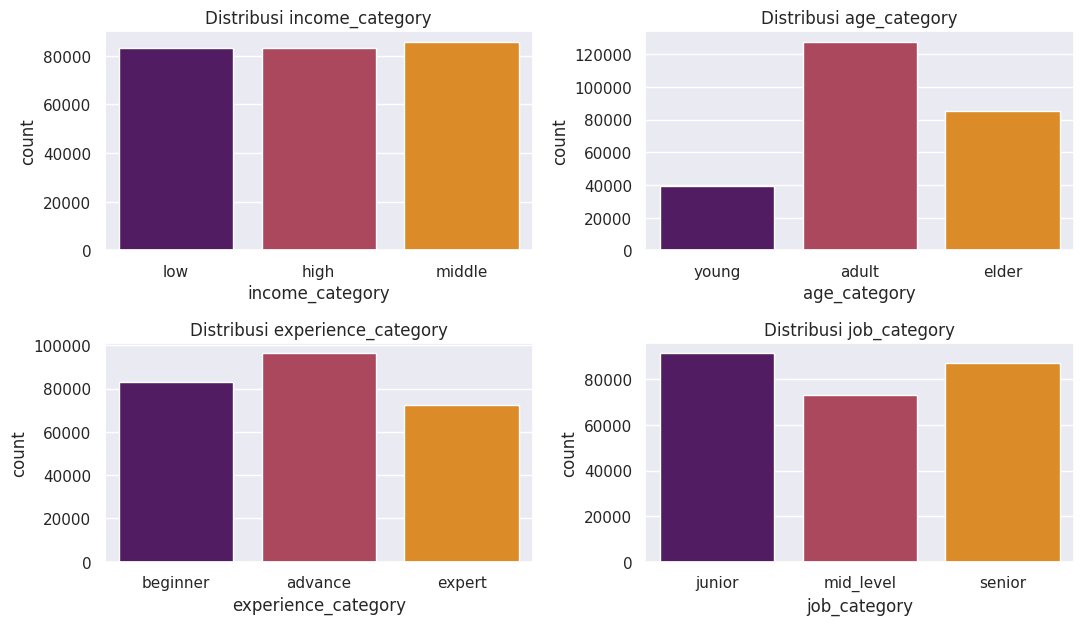

In [ ]:
# Mengatur warna dan ukuran
sns.set(style="darkgrid")
plt.figure(figsize=(11, 9))

# Loop untuk membuat subplot
for i in range(0, len(nums_group)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=merged_df[nums_group[i]], palette='inferno')
    plt.title(f'Distribusi {nums_group[i]}')
    plt.tight_layout()

# Menampilkan hasil
plt.show()

**Pengelompokkan Data Categorical**

In [ ]:
#Data professions
profession_group = {
    'engineer tech': ['Computer_hardware_engineer', 'Industrial_Engineer', 'Mechanical_engineer', 'Chemical_engineer',
                        'Biomedical_Engineer', 'Software_Developer', 'Petroleum_Engineer', 'Civil_engineer',
                        'Design_Engineer', 'Engineer','Technician', 'Technology_specialist', 'Computer_operator','Technical_writer'],
    'design art': ['Web_designer', 'Fashion_Designer', 'Graphic_Designer', 'Artist', 'Designer','Comedian','Chef'],
    'health': ['Dentist', 'Surgeon', 'Microbiologist', 'Nurse','Psychologist','Physician'],
    'consultant': ['Financial_Analyst', 'Consultant', 'Chartered_Accountant','Lawyer', 'Economist','Surveyor', 'Analyst',
                    'Architect','Statistician', 'Scientist', 'Geologist'],
    'office management': ['Magistrate', 'Secretary', 'Official', 'Hotel_Manager','Drafter','Librarian'],
    'aviation': ['Flight_attendant', 'Aviator','Air_traffic_controller'],
    'gov': ['Police_officer','Politician','Army_officer', 'Firefighter', 'Civil_servant']
}

In [ ]:
df['profession_group'] = df['profession'].apply(lambda x: next((key for key, value in profession_group.items() if x in value), 'other'))

In [ ]:
def city_group(city):
    if city in ['Delhi city', 'Mumbai', 'Kolkata', 'Chennai', 'Bangalore']:
        return 'Metro'
    elif city in ['Ahmedabad', 'Hyderabad', 'Pune', 'Surat', 'Jaipur', 'Lucknow', 'Kanpur', 'Nagpur', 'Visakhapatnam', 'Indore', 'Thane',
                  'Bhopal', 'Pimpri-Chinchwad', 'Patna', 'Vadodara', 'Ghaziabad', 'Ludhiana', 'Agra', 'Nashik', 'Faridabad', 'Meerut', 'Rajkot',
                  'Varanasi', 'Srinagar', 'Amritsar', 'Allahabad', 'Jabalpur', 'Gwalior', 'Vijayawada', 'Jodhpur', 'Raipur', 'Kota', 'Guwahati', 'Chandigarh city']:
        return 'Urban'
    elif city in ['Navi Mumbai', 'Kalyan-Dombivli', 'Vasai-Virar', 'Mira-Bhayandar', 'Thiruvananthapuram', 'Bhiwandi', 'Noida', 'Bhopal', 'Howrah',
                  'Saharanpur', 'Berhampur', 'Suryapet', 'Muzaffarpur', 'Nadiad', 'Siliguri', 'Bhavnagar', 'Kurnool', 'Tenali', 'Satna', 'Nandyal',
                  'Etawah', 'Morena', 'Ballia', 'Machilipatnam', 'Mau', 'Machilipatnam', 'Bhagalpur', 'Siwan', 'Meerut', 'Dibrugarh', 'Gaya', 'Darbhanga',
                  'Hajipur', 'Mirzapur', 'Akola', 'Satna', 'Motihari', 'Jalna', 'Ramgarh', 'Ozhukarai', 'Saharsa', 'Munger', 'Farrukhabad', 'Nangloi Jat',
                  'Thoothukudi', 'Nagercoil', 'Rourkela', 'Jhansi', 'Sultan Pur Majra']:
        return 'Suburban'
    else:
        return 'Rural'

In [ ]:
df['city_group'] = df['city'].apply(city_group)

In [ ]:
state_group = {
    'north_zone': ['Uttar Pradesh', 'Haryana', 'Jammu and Kashmir', 'Punjab', 'Uttarakhand', 'Chandigarh', 'Delhi', 'Himachal Pradesh'],
    'east_zone': ['Bihar', 'Jharkhand', 'Odisha', 'West Bengal', 'Assam', 'Sikkim', 'Tripura', 'Mizoram', 'Manipur'],
    'south_zone': ['Andhra Pradesh', 'Tamil Nadu', 'Karnataka', 'Telangana', 'Kerala', 'Puducherry'],
    'west_zone': ['Maharashtra', 'Gujarat', 'Rajasthan', 'Chhattisgarh', 'Madhya Pradesh'],
}

In [ ]:
df['state_group'] = df['state'].apply(lambda x: next((key for key, value in state_group.items() if x in value), 'Other'))

In [ ]:
df

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,income_category,age_category,experience_category,job_category,profession_group,city_group,state_group
Id,,,,,,,,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya Pradesh,3,13,0,low,young,beginner,junior,engineer tech,Rural,west_zone
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,high,adult,advance,mid_level,engineer tech,Rural,west_zone
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,middle,elder,beginner,junior,engineer tech,Rural,south_zone
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,middle,adult,beginner,junior,engineer tech,Rural,east_zone
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli,Tamil Nadu,3,14,1,middle,adult,advance,junior,gov,Rural,south_zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West Bengal,6,11,0,high,adult,advance,senior,health,Metro,east_zone
251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya Pradesh,6,11,0,low,young,advance,senior,gov,Rural,west_zone
251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0,middle,adult,advance,senior,engineer tech,Suburban,west_zone


In [ ]:
cats_group = ['profession_group', 'city_group', 'state_group']

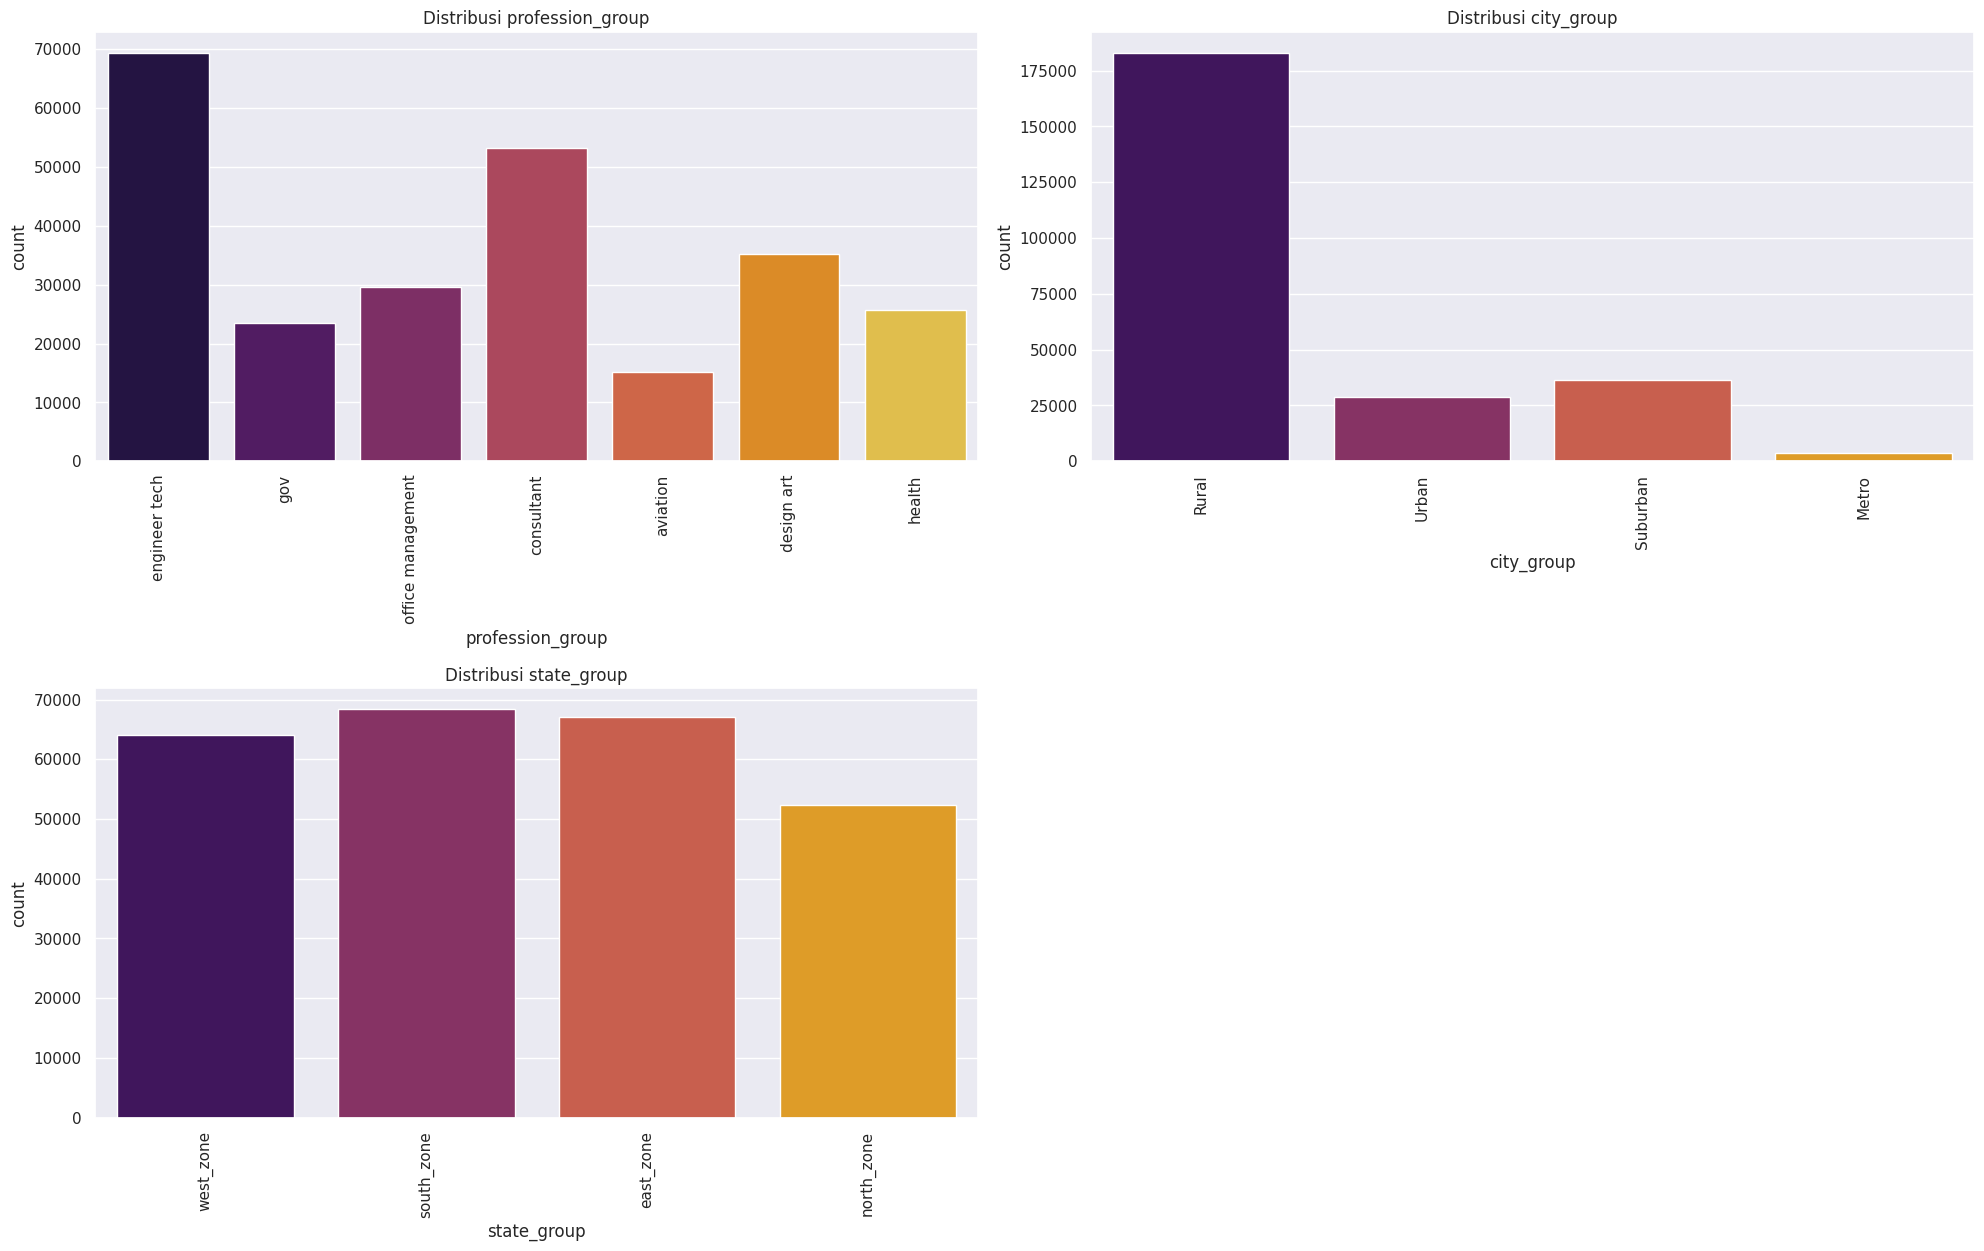

In [ ]:
# Mengatur warna dan ukuran
sns.set(style="darkgrid")
plt.figure(figsize=(20, 18))

# Loop untuk membuat subplot
for i in range(0, len(cats_group)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[cats_group[i]], palette='inferno')
    plt.xticks(rotation=90)
    plt.title(f'Distribusi {cats_group[i]}')
    plt.tight_layout()

# Menampilkan hasil
plt.show()

Setelah dilakukan grouping pada kolom-kolom yang memiliki kategori yang luas, countplot lebih mudah dibaca dan selanjutnya akan diproses lebih lanjut pada Multivariate Analysis.

## Multivariate Analysis

### Mencari Korelasi antar Fitur Numerical

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
corr = corr.mask(mask)

fig = go.Figure()
fig.add_trace(go.Heatmap(z = corr, x = corr.columns.tolist(),y = corr.columns.tolist(),colorscale = 'RdBu',xgap = 1,ygap = 1,hoverinfo = "none"))
fig.add_trace(go.Heatmap(
    z=corr,
    x=corr.columns.tolist(),
    y=corr.columns.tolist(),
    text=corr.round(2),  # Menambahkan nilai korelasi sebagai teks (dapat disesuaikan)
    colorscale='RdBu',
    xgap=1,
    ygap=1,
    hoverinfo="text"  # Menampilkan nilai korelasi sebagai hover info
))
 #Menambahkan anotasi pada setiap kotak
for i, row in enumerate(corr.values):
    for j, value in enumerate(row):
        fig.add_annotation(
            text=str(round(value, 2)),
            x=corr.columns[j],
            y=corr.columns[i],
            xref='x1',
            yref='y1',
            showarrow=False,
            font=dict(color='yellow' if abs(value) > 0.5 else 'white')  # Menentukan warna teks berdasarkan nilai korelasi
        )
fig.update_layout(
    {
        "title": {"text": "<b>Correlation in numerical features</b>","x": 0.5,"y": 0.9,"font": {"size": 15}
        },
        "xaxis": {"title": "Columns","tickfont": {"size": 8}
        },
        "yaxis": {"title": "Columns","tickfont": {"size": 8}
        },

        "template":'plotly_white',
        "yaxis_autorange" : "reversed"
    }
)
fig.show()

Terlihat dari korelasi heatmap diatas terlihat bahwa current_job_years dan experience mempunyai korelasi yang besar untuk itu kita akan memilih salah satu saja sebagai fitur dari target agar tidak terjadi Multikolinearitas.

### Distribusi data numerical terhadap risk flag

In [ ]:
df[nums].head()

,income,age,experience,current_job_yrs,current_house_yrs,risk_flag
Id,,,,,,
1,1303834,23,3,3,13,0
2,7574516,40,10,9,13,0
3,3991815,66,4,4,10,0
4,6256451,41,2,2,12,1
5,5768871,47,11,3,14,1


In [ ]:
# Melihat distribusi data numerical terhadap risk flag
nums_col = ['income', 'age', 'experience', 'current_job_yrs',
       'current_house_yrs']
for num in nums_col:
    plt.figure(figsize=(8, 6))
    risk_flag_num = df[df['risk_flag'] == 1][num]
    not_risk_flag_num = df[df['risk_flag']==0][num]
    sns.boxplot([not_risk_flag_num,risk_flag_num], color='orange')
    plt.title(f'{num} distribution based on different Classes')
    plt.xticks([0, 1], ['Not at Risk', 'At Risk'])
    plt.show()

In [ ]:
cats = ['marital_status', 'house_ownership',
       'car_ownership','income_category','age_category',
       'experience_category', 'job_category', 'profession_group', 'city_group',
       'state_group']
df_categorikal = df[cats]
df_categorikal.head()

,marital_status,house_ownership,car_ownership,income_category,age_category,experience_category,job_category,profession_group,city_group,state_group
Id,,,,,,,,,,
1,single,rented,no,low,young,beginner,junior,engineer tech,Rural,west_zone
2,single,rented,no,high,adult,advance,mid_level,engineer tech,Rural,west_zone
3,married,rented,no,middle,elder,beginner,junior,engineer tech,Rural,south_zone
4,single,rented,yes,middle,adult,beginner,junior,engineer tech,Rural,east_zone
5,single,rented,no,middle,adult,advance,junior,gov,Rural,south_zone


### Mencari Korelasi antar fitur kategorikal

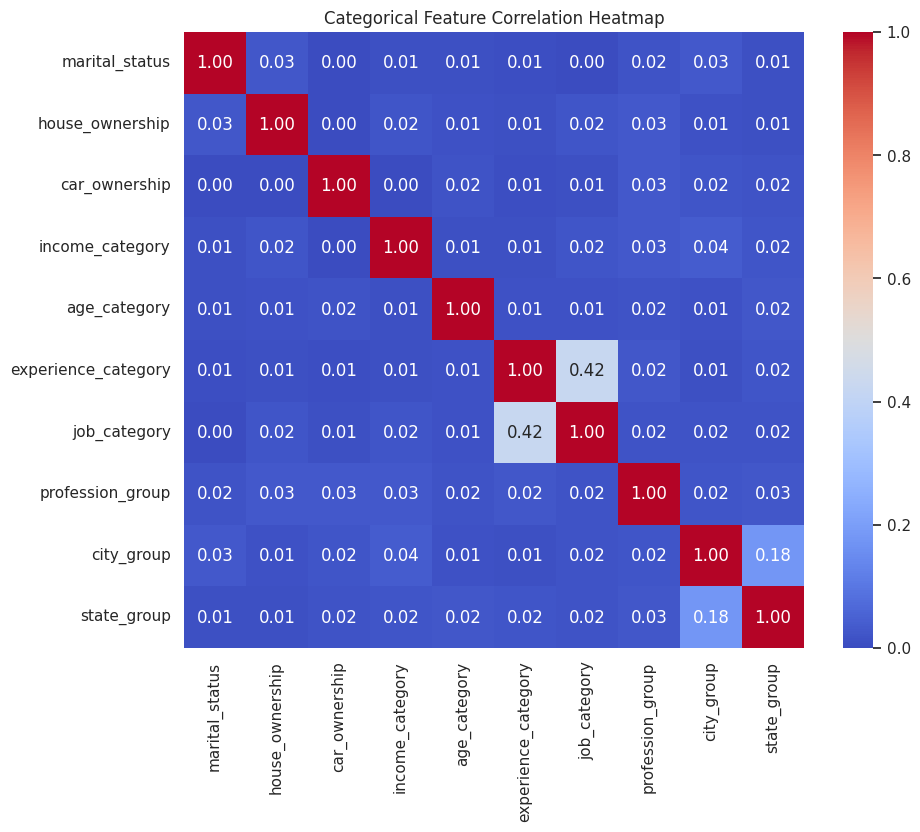

In [ ]:
# Label encoding untuk mengubah kategori menjadi numerik
le = LabelEncoder()
df_encoded = df_categorikal.apply(le.fit_transform)

# Fungsi untuk menghitung korelasi Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Hitung korelasi antar fitur kategorikal
corr_matrix = pd.DataFrame(index=cats, columns=cats)

for i in range(len(cats)):
    for j in range(i, len(cats)):
        corr = cramers_v(df_encoded[cats[i]], df_encoded[cats[j]])
        corr_matrix.at[cats[i], cats[j]] = corr
        corr_matrix.at[cats[j], cats[i]] = corr

# Konversi nilai matriks korelasi ke tipe data float
corr_matrix = corr_matrix.astype(float)
# Buat heatmap untuk memvisualisasikan korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Categorical Feature Correlation Heatmap')
plt.show()


Terlihat bahwa korelasi job_category dan experience_category adalah korelasi yang paling tinggi di data kategorikal ini begitu juga dengan city_group dan state_group

### Melihat persentase perbandinganrisk flag dalam setiap kategori

In [ ]:
df[cats].head()

,marital_status,house_ownership,car_ownership,income_category,age_category,experience_category,job_category,profession_group,city_group,state_group
Id,,,,,,,,,,
1,single,rented,no,low,young,beginner,junior,engineer tech,Rural,west_zone
2,single,rented,no,high,adult,advance,mid_level,engineer tech,Rural,west_zone
3,married,rented,no,middle,elder,beginner,junior,engineer tech,Rural,south_zone
4,single,rented,yes,middle,adult,beginner,junior,engineer tech,Rural,east_zone
5,single,rented,no,middle,adult,advance,junior,gov,Rural,south_zone


<Figure size 1000x800 with 0 Axes>

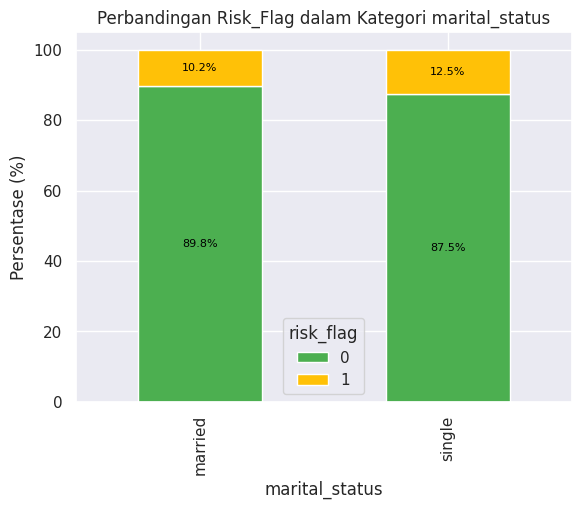

<Figure size 1000x800 with 0 Axes>

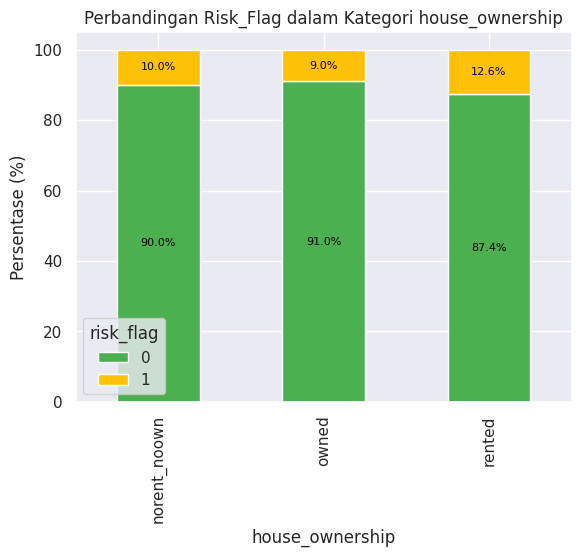

<Figure size 1000x800 with 0 Axes>

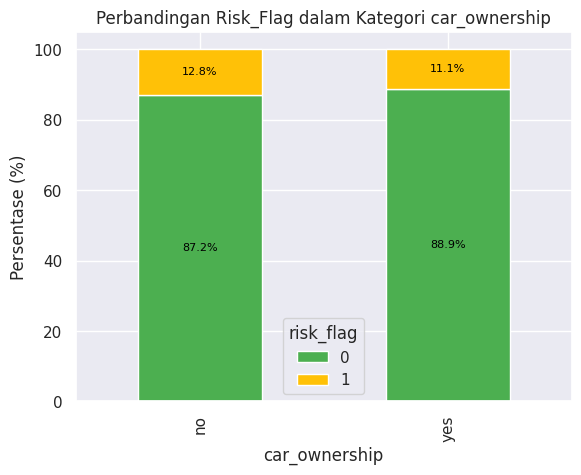

<Figure size 1000x800 with 0 Axes>

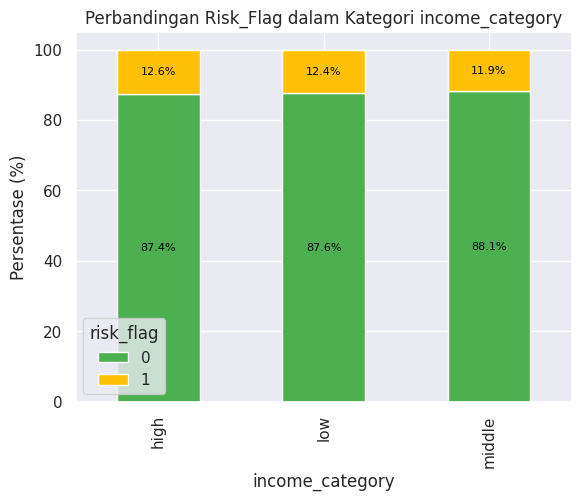

<Figure size 1000x800 with 0 Axes>

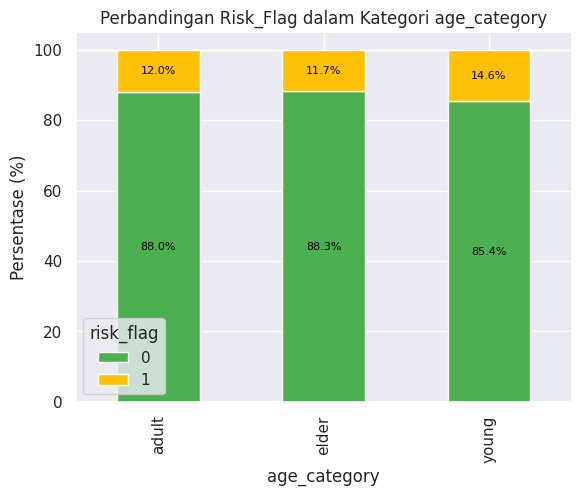

<Figure size 1000x800 with 0 Axes>

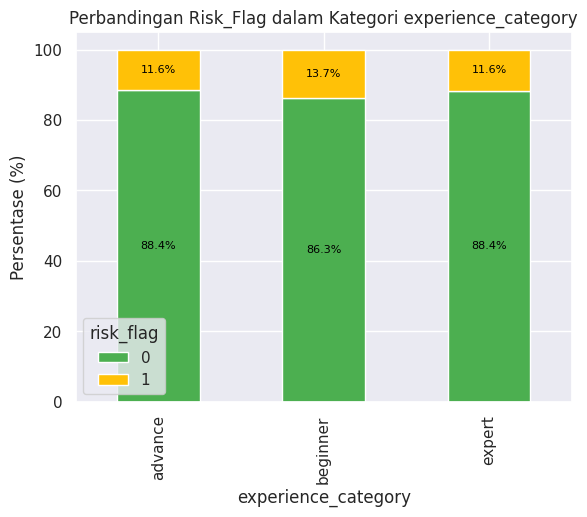

<Figure size 1000x800 with 0 Axes>

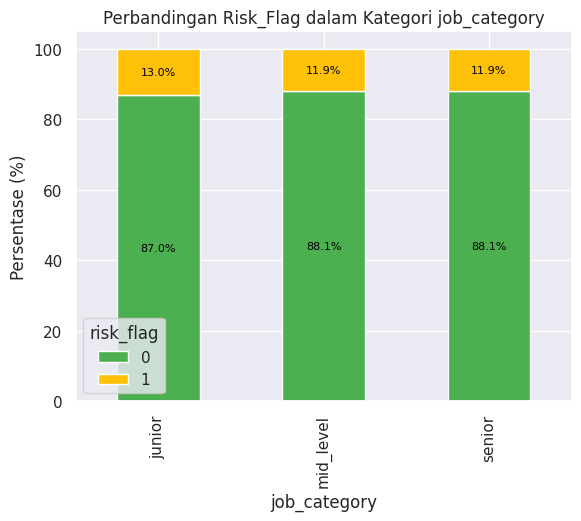

<Figure size 1000x800 with 0 Axes>

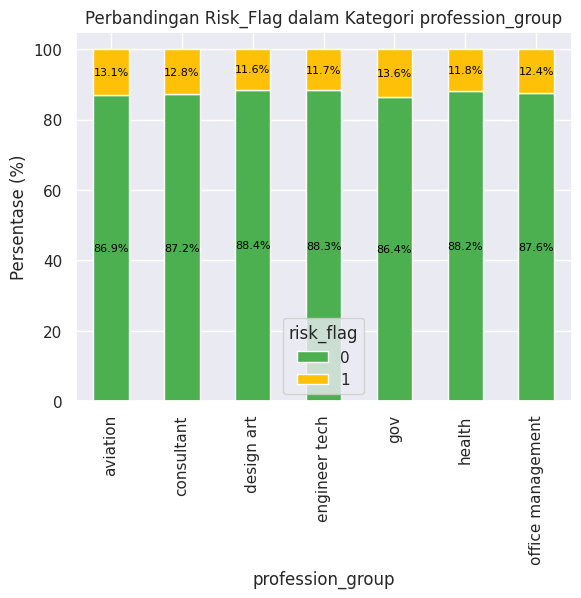

<Figure size 1000x800 with 0 Axes>

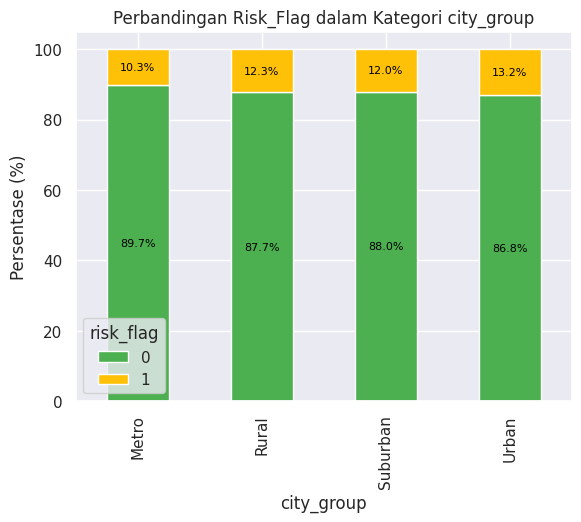

<Figure size 1000x800 with 0 Axes>

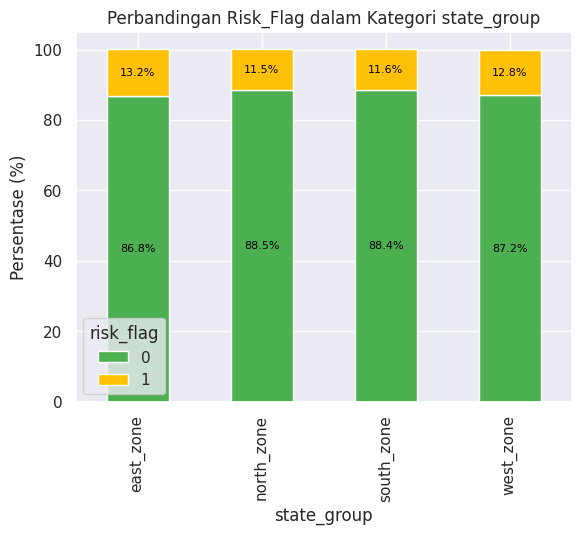

In [ ]:


for cat in cats:
    plt.figure(figsize=(10, 8))

    # Menghitung persentase risk flag dalam setiap kategori
    cats_group = df.groupby(cat)['risk_flag'].value_counts(normalize=True).unstack() * 100

    ax = cats_group.plot(kind='bar', stacked=True, color=['#4CAF50', '#FFC107'])

    plt.title(f'Perbandingan Risk_Flag dalam Kategori {cat}')
    plt.ylabel('Persentase (%)')

    # Menambahkan label persentase pada plot
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2),
                ha='center', va='center', fontsize=8, color='black')

    plt.show()

## Business Insight and Recomendation

### Business Insight



1.  Dari analisis perbandingan risk flag dalam kategori tingkat pendapatan (low, mid, high), ditemukan bahwa tingkat risk flag cenderung lebih tinggi pada kelompok pendapatan rendah,  adanya kemungkinan kesulitan keuangan. Meskipun begitu, terdapat variasi dalam tingkat risk flag pada kategori pendapatan menengah, memerlukan analisis lebih lanjut untuk mengidentifikasi faktor-faktor penyebab. Sedangkan pada kelompok pendapatan tinggi, meskipun tingkat risk flag lebih tinggi, masih terdapat indikasi risiko yang perlu dicermati.
2.   Dari perbandingan risk flag di berbagai kelas kota, terlihat tingkat risk flag lebih rendah di kota metropolitan (10.3%), sementara kota rural memiliki tingkat tertinggi (12.3%). Rekomendasi melibatkan peningkatan keamanan keuangan di kota metropolitan, pengembangan strategi khusus untuk mengurangi risiko di kota rural, serta pemantauan dan analisis lebih lanjut untuk wilayah suburban. Di kota urban, dianjurkan promosi diversifikasi dan manajemen risiko yang lebih cermat.
3.  Dari perbandingan risk flag antara status perkawinan, terlihat bahwa tingkat risk flag lebih rendah pada individu yang sudah menikah (10.2%) dibandingkan dengan mereka yang masih single (12.5%). Rekomendasi bisnis mencakup peningkatan kolaborasi keuangan bagi pasangan yang sudah menikah, sementara individu yang masih single dapat diuntungkan dari program edukasi finansial khusus yang fokus pada manajemen risiko dan perencanaan masa depan.




### Business Insight



1.   Membuat sebuah edukasi finansial untuk kelompok pendapatan rendah, menganalisi pada kelompok pendapatan menengah untuk menyesuaikan strategi risiko, serta pengembangan strategi perlindungan aset dan manajemen risiko khusus untuk kelompok pendapatan tinggi. Dan juga adanya tekhnologi, seperti analisis prediktif dan machine learning, dapat membatu Perusahaan meningkatkan manajemen risiko dengan pendekatan yang lebih terfokus dan responsif terhadap kebutuhan masing-masing kelompok pendapatan.
2.   mencakup peningkatan keamanan keuangan di kota metropolitan (10.3%), pengembangan strategi khusus untuk mengurangi risiko di kota rural (12.3%), pemantauan dan analisis lebih lanjut untuk wilayah suburban, serta promosi diversifikasi dan manajemen risiko yang lebih cermat di kota urban.
3.  Mendorong kolaborasi keuangan yang lebih aktif di antara pasangan yang sudah menikah, sambil menyediakan program edukasi finansial khusus bagi individu yang masih single, dapat membantu mengelola risiko keuangan secara lebih efektif. Implementasi strategi ini diharapkan dapat memberikan solusi yang lebih terfokus dan sesuai dengan kebutuhan unik dari setiap kelompok, serta meningkatkan kesejahteraan finansial secara keseluruhan.

